## **Análise Comportamental de Trabalhadores em Home Office Durante a Pandemia de COVID-19 **

  Colab colaborativo desenvolvido por Christian Dênis Dalzochio, Gabriel Scola, Gustavo Haupt Canello, Vittoria Luiza da S. Thomasini. O presente ambiente tem o objetivo de analisar os dados gerados por um formulário do Google Forms. Com 228 respostas, dividimos o formulário em 4 seções julgadas como mais importantes: Foco, saúde mental, relação do trabalhador com a empresa e idades. Diante disso, foi possível relatar e comprovar qual realmente foi a sensação e o impacto do HomeOffice não só em questões de produtividade e foco, mas também com realção a convívio e estresse. 


  Sendo assim, com a ajuda do python e das bibliotecas pandas e pyplot foi possível gerar alguns gráficos e análises decorrentes das respostas, para assim, no final se ter uma definição de perfís por meio de alguns métodos matemáticos de média e padrões de perfis. Além disso, criamos um perfil do futuro e analisamos ele separadamente dos demais, no final do ambiente colaborativo veremos o perfil Anywhere, que nada mais é do que o perfil do futuro, com "skills" próprias para um ambiente de trabalho moderno, horarios flexíveis, mobilidade de locais e "n" fatores relevantes.

  Informações gerais sobre os dados:


*   Todos os dados foram exportados do formulário e inseridos em uma planilha .csv que, posteriormente foi upada para nosso ambiente do github
*   Cada ramificação citada acima tem uma planilha respectiva, e, além delas, ainda temos uma geral com todas as informações coletadas
*   No inicio de todas as seções foi necessário fazer o import da planilha para o Colab
*   Todas as respostas de "Sim" ou "Não" foram alteradas para 0 ou 1, considerando que respotas de "Sim" correspodem a 1 e respostas de "Nâo" correspodem a 0. Fizemos isso pois fica mais fácil de tratar os dados apenas com números.






## **Foco e Produtividade**

Abaixo iniciamos o estudo analisando questões de produtividade e foco no trabalho de casa durante a pandemia. Tendo como principais pergutas para essa seção listadas abaixo:


*   Como você avalia a sua produtividade durante a pandemia?
*   Como você avalia o seu foco durante o trabalho de Home Office?



In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams["figure.figsize"] = (20, 5)
respostas_teste_1 = 'https://github.com/vittoria-thomasini/comportment-analytics-covid19/blob/main/Planilhas/Foco.csv?raw=true'
dados_df = pd.read_csv(respostas_teste_1, delimiter=';')
dados_df = dados_df.replace('Sim', 1)
dados_df = dados_df.replace('Não', 0)
dados_df.head()

,Qual sua Idade?,Você trabalhou de casa durante a pandemia?,Você já exercia esse modelo de trabalho?,Você se vê e/ou pretende trabalhar remotamente no futuro?,Como você avalia sua adaptação ao Home Office?,Como você avalia a sua produtividade durante a pandemia?,Como você avalia o seu foco durante o trabalho de Home Office?,Como foi sua experiência em trabalhar de casa?
0,Entre 18 e 25 anos,1,0,1,5,4,4,5
1,Entre 18 e 25 anos,1,0,0,3,3,3,3
2,Entre 18 e 25 anos,1,0,0,4,3,4,4
3,Entre 18 e 25 anos,1,0,1,4,3,2,3
4,Entre 18 e 25 anos,1,0,1,3,3,2,2


In [ ]:
display(dados_df.describe())

,Você trabalhou de casa durante a pandemia?,Você já exercia esse modelo de trabalho?,Você se vê e/ou pretende trabalhar remotamente no futuro?,Como você avalia sua adaptação ao Home Office?,Como você avalia a sua produtividade durante a pandemia?,Como você avalia o seu foco durante o trabalho de Home Office?,Como foi sua experiência em trabalhar de casa?
count,153.0,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,1.0,0.215686,0.718954,3.843137,3.614379,3.372549,3.660131
std,0.0,0.412648,0.450986,1.007326,1.088965,1.105503,1.077054
min,1.0,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,1.0,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000
50%,1.0,0.000000,1.000000,4.000000,4.000000,4.000000,4.000000
75%,1.0,0.000000,1.000000,5.000000,4.000000,4.000000,4.000000
max,1.0,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
filtroneutro = dados_df.loc[dados_df['Como você avalia o seu foco durante o trabalho de Home Office?'] == 3]
filtrobom = dados_df.loc[dados_df['Como você avalia o seu foco durante o trabalho de Home Office?'] > 3]
filtroruim = dados_df.loc[dados_df['Como você avalia o seu foco durante o trabalho de Home Office?'] < 3]
neutras = filtroneutro['Como você avalia o seu foco durante o trabalho de Home Office?'].count()
bom = filtrobom['Como você avalia o seu foco durante o trabalho de Home Office?'].count()
ruim = filtroruim['Como você avalia o seu foco durante o trabalho de Home Office?'].count()
resposta = ruim, neutras, bom
resposta

(36, 39, 78)

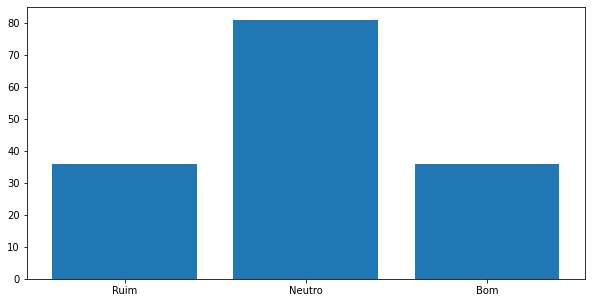

In [141]:
grupos = ['Ruim', 'Neutro', 'Bom']
plt.bar(grupos, resposta)
plt.show()

[Text(0.5, 1.0, 'Agrupamento Foco')]

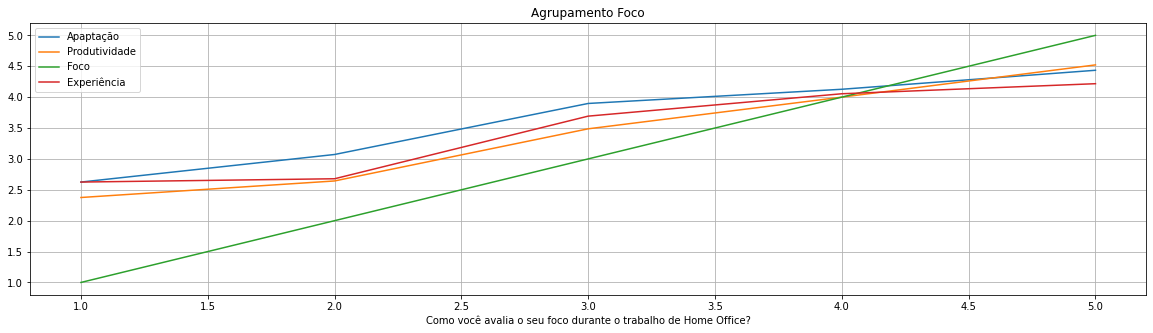

In [ ]:
foco = dados_df['Como você avalia o seu foco durante o trabalho de Home Office?']

dados_df2 = dados_df.drop(columns=['Qual sua Idade?','Você trabalhou de casa durante a pandemia?','Você já exercia esse modelo de trabalho?','Você se vê e/ou pretende trabalhar remotamente no futuro?'])
graf=dados_df2.groupby(foco).mean().plot(grid=True)

#Alterei a legenda para se tornar mais legível
graf.legend(["Adaptação", "Produtividade", "Foco", "Experiência"])
graf.set(title="Agrupamento Foco")



## **Saúde Mental**

Após a analise do foco e produtividade em HomeOffice, partimos para o estudo da saúde mental do pessoal que respondeu a pesquisa. Abaixo seguem algumas analises feitas em cima de pergutas com cunho de estresse e fadiga, tendo como principal base para o estudo as perguntas dispostas abaixo:


*   Como você avalia o seu nível de fadiga (Cansaço excessivo) durante o trabalho de Home Office?
*   Como você avalia o seu nível de estresse durante o trabalho de Home Office?
*   Como foi sua experiência em trabalhar em casa?



In [148]:
import pandas as pd
import matplotlib as matplt

matplt.rcParams["figure.figsize"] = (10, 5)

respostas = 'https://github.com/vittoria-thomasini/comportment-analytics-covid19/blob/main/Planilhas/Saude%20mental.csv?raw=true'
dados = pd.read_csv(respostas,  delimiter=';' )

idade = dados['Qual sua Idade?']
pandemia = dados['Você trabalhou de casa durante a pandemia?']
futuro = dados['Você se vê e/ou pretende trabalhar remotamente no futuro?']
fadiga = dados['Como você avalia o seu nível de fadiga (Cansaço excessivo) durante o trabalho de Home Office?']
estresse = dados['Como você avalia o seu nível de estresse durante o trabalho de Home Office?']
experiencia = dados['Como foi sua experiência em trabalhar de casa?']

dados = dados.replace('Sim', 1)
dados = dados.replace('Não', 0)
dados.head()

,Qual sua Idade?,Você trabalhou de casa durante a pandemia?,Você se vê e/ou pretende trabalhar remotamente no futuro?,Como você avalia o seu nível de fadiga (Cansaço excessivo) durante o trabalho de Home Office?,Como você avalia o seu nível de estresse durante o trabalho de Home Office?,Como foi sua experiência em trabalhar de casa?
0,Entre 18 e 25 anos,1,1,3,3,5
1,Entre 18 e 25 anos,1,0,3,3,3
2,Entre 18 e 25 anos,1,0,5,4,4
3,Entre 18 e 25 anos,1,1,5,3,3
4,Entre 18 e 25 anos,1,1,3,4,2


In [146]:
#Quantidade de valores não nulos
dados.count()

Qual sua Idade?                                                                                  153
Você trabalhou de casa durante a pandemia?                                                       153
Você se vê e/ou pretende trabalhar remotamente no futuro?                                        153
Como você avalia o seu nível de fadiga (Cansaço excessivo) durante o trabalho de Home Office?    153
Como você avalia o seu nível de estresse durante o trabalho de Home Office?                      153
Como foi sua experiência em trabalhar de casa?                                                   153
dtype: int64

Como todos os entrevistados responderam que trabalharam durante a pandemia em casa foi optado por desconsiderá-la.

In [ ]:
dados = dados.drop(columns=['Você trabalhou de casa durante a pandemia?'])
dados.head()

,Qual sua Idade?,Você se vê e/ou pretende trabalhar remotamente no futuro?,Como você avalia o seu nível de fadiga (Cansaço excessivo) durante o trabalho de Home Office?,Como você avalia o seu nível de estresse durante o trabalho de Home Office?,Como foi sua experiência em trabalhar de casa?
0,Entre 18 e 25 anos,1,3,3,5
1,Entre 18 e 25 anos,0,3,3,3
2,Entre 18 e 25 anos,0,5,4,4
3,Entre 18 e 25 anos,1,5,3,3
4,Entre 18 e 25 anos,1,3,4,2


In [ ]:
display(dados.describe())

,Você se vê e/ou pretende trabalhar remotamente no futuro?,Como você avalia o seu nível de fadiga (Cansaço excessivo) durante o trabalho de Home Office?,Como você avalia o seu nível de estresse durante o trabalho de Home Office?,Como foi sua experiência em trabalhar de casa?
count,153.000000,153.000000,153.000000,153.000000
mean,0.718954,3.117647,3.196078,3.660131
std,0.450986,1.031996,1.135891,1.077054
min,0.000000,1.000000,1.000000,1.000000
25%,0.000000,2.000000,2.000000,3.000000
50%,1.000000,3.000000,3.000000,4.000000
75%,1.000000,4.000000,4.000000,4.000000
max,1.000000,5.000000,5.000000,5.000000


Por termos o resultado de 75% do entrevistados pretenderem trabalhar remotamente no futuro declararam que em grande maioria seu nível de fadiga foi muito bom , ou seja, baixa ou aceitável e seu nível de estresse também, o que podemos constatar avaliando que os entrevistados declararam que a sua experiência trabalhando em Home Office foi marjoritariamente muito boa.

In [ ]:
futuro.value_counts()

Sim    110
Não     43
Name: Você se vê e/ou pretende trabalhar remotamente no futuro?, dtype: int64

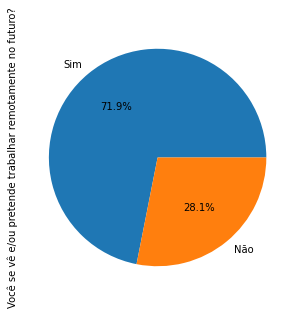

In [154]:
futuro.value_counts().plot.pie(autopct='%1.1f%%');

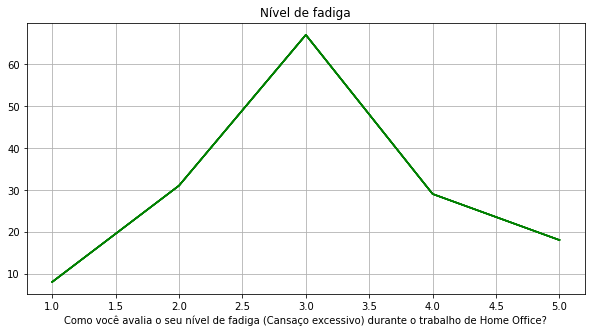

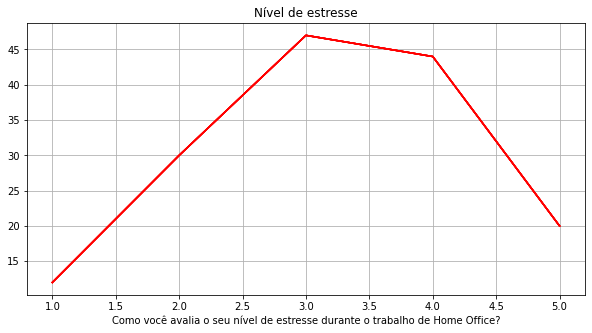

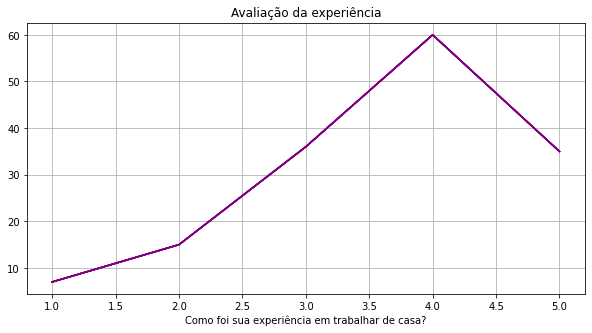

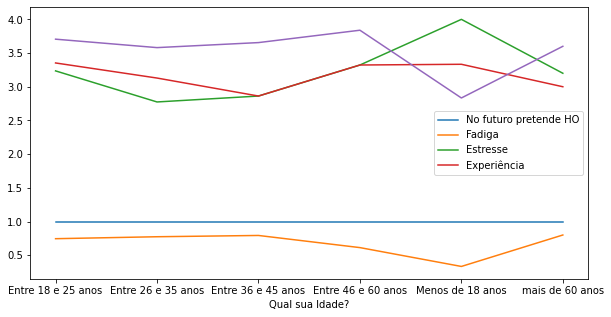

In [178]:
dados.groupby(fadiga).count().plot(legend=False, grid=True, color='green',title='Nível de fadiga' );

dados.groupby(estresse).count().plot(legend=False, grid=True, color='red', title='Nível de estresse');

dados.groupby(experiencia).count().plot(legend=False, grid=True, color='purple', title='Avaliação da experiência');

compara = dados.groupby(idade).mean().plot();

compara.legend(["No futuro pretende HO", "Fadiga", "Estresse", "Experiência"]);

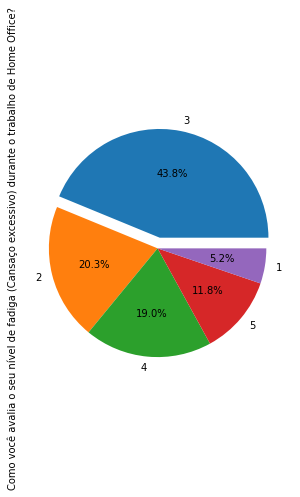

In [192]:
#@title Percentagem de Nível de Fadiga
explode = (0.1, 0, 0, 0, 0) 
fadiga.value_counts().plot.pie(autopct='%1.1f%%', explode=explode );

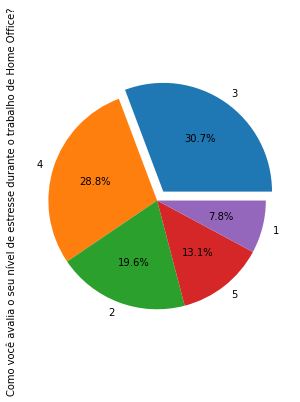

In [193]:
#@title Percentagem de Nível de Estresse
explode = (0.1, 0, 0, 0, 0) 
estresse.value_counts().plot.pie(autopct='%1.1f%%', explode=explode);

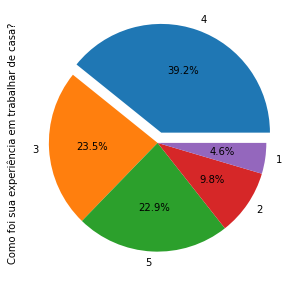

In [194]:
#@title Percentagem de Avaliação de Experiência
explode = (0.1, 0, 0, 0, 0) 
experiencia.value_counts().plot.pie(autopct='%1.1f%%', explode=explode);

## **Relação do trabalhador com a empresa**

Nesta seção voltamos nossas atenções para o auxilio que as empresas deram nessa migração do ambiente presencial para o ambiente de home office. Diante disso, questões como suporte e convivência são analisadas abaixo, tendo como principais pergutas:

*   Como você avalia o suporte/auxílio que a sua empresa prestou durante o trabalho de Home Office?	
*   Como você avalia o entrosamento com seus colegas de trabalho durante Home Office?	
*   Você se vê e/ou pretende trabalhar remotamente no futuro?	



In [195]:
import pandas as pd
import matplotlib.pyplot as plt

respostasgu = pd.read_csv('https://raw.githubusercontent.com/vittoria-thomasini/comportment-analytics-covid19/main/Planilhas/Empresa.csv', delimiter = ';')
respostasgu.head()

,Qual sua Idade?,Você trabalhou de casa durante a pandemia?,Você já exercia esse modelo de trabalho?,Você sente que sua carga de trabalho aumentou durante o trabalho de casa?,Por conta do home office você trabalhou mais do que a sua carga horária contratual?,Você se vê e/ou pretende trabalhar remotamente no futuro?,Como você avalia o suporte/auxílio que a sua empresa prestou durante o trabalho de Home Office?,Como você avalia o entrosamento com seus colegas de trabalho durante Home Office?,Como foi sua experiência em trabalhar de casa?
0,Entre 18 e 25 anos,Sim,Não,Não,Não,Sim,3,4,5
1,Entre 18 e 25 anos,Sim,Não,Não,Não,Não,3,3,3
2,Entre 18 e 25 anos,Sim,Não,Sim,Sim,Não,5,5,4
3,Entre 18 e 25 anos,Sim,Não,Não,Não,Sim,3,2,3
4,Entre 18 e 25 anos,Sim,Não,Sim,Sim,Sim,5,4,2


- Abaixo subistutimos todas as respostas de "Sim" e "Não" por 0 e 1, considerando que respostas "Sim" correspondem a 1 e respostas "Não" correspodem a 0. Fizemos isso pois fica mais fácil de tratar os dados com números apenas.

In [196]:
respostasgu = respostasgu.replace('Sim', 1)
respostasgu = respostasgu.replace('Não', 0)
respostasgu.head()  

,Qual sua Idade?,Você trabalhou de casa durante a pandemia?,Você já exercia esse modelo de trabalho?,Você sente que sua carga de trabalho aumentou durante o trabalho de casa?,Por conta do home office você trabalhou mais do que a sua carga horária contratual?,Você se vê e/ou pretende trabalhar remotamente no futuro?,Como você avalia o suporte/auxílio que a sua empresa prestou durante o trabalho de Home Office?,Como você avalia o entrosamento com seus colegas de trabalho durante Home Office?,Como foi sua experiência em trabalhar de casa?
0,Entre 18 e 25 anos,1,0,0,0,1,3,4,5
1,Entre 18 e 25 anos,1,0,0,0,0,3,3,3
2,Entre 18 e 25 anos,1,0,1,1,0,5,5,4
3,Entre 18 e 25 anos,1,0,0,0,1,3,2,3
4,Entre 18 e 25 anos,1,0,1,1,1,5,4,2


Gerando histogramas para cada uma das respostas relevantes do formulário.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faddc1e5790>]],
      dtype=object)

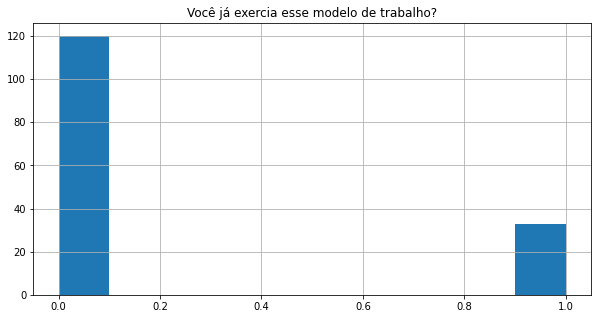

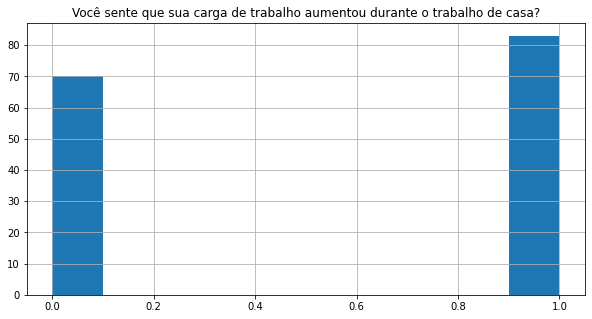

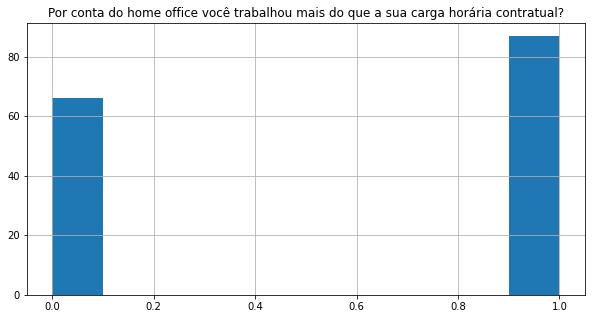

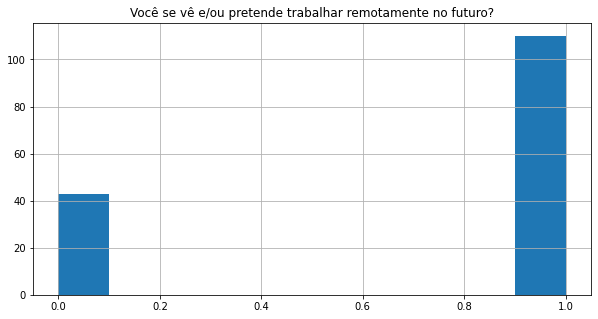

In [ ]:
respostasgu.hist(['Você já exercia esse modelo de trabalho?'])
respostasgu.hist(['Você sente que sua carga de trabalho aumentou durante o trabalho de casa?'])
respostasgu.hist(['Por conta do home office você trabalhou mais do que a sua carga horária contratual?'])
respostasgu.hist(['Você se vê e/ou pretende trabalhar remotamente no futuro?'])

Após ter uma base das respostas de "Sim" ou "Não", foram criados filtros em cima das respostas de 1 a 5, considerando respostas 1 e 2 como ruim, 3 como neutro e 4 e 5 como bom. Chegando assim num valor total de pessoas e suas respectivas notas para o entrosamento entre os colegas trabalhando de casa

In [197]:
filtroneutro = respostasgu.loc[respostasgu['Como você avalia o entrosamento com seus colegas de trabalho durante Home Office?'] == 3]
filtrobom = respostasgu.loc[respostasgu['Como você avalia o entrosamento com seus colegas de trabalho durante Home Office?'] > 3]
filtroruim = respostasgu.loc[respostasgu['Como você avalia o entrosamento com seus colegas de trabalho durante Home Office?'] < 3]
neutras = filtroneutro['Como você avalia o entrosamento com seus colegas de trabalho durante Home Office?'].count()
bom = filtrobom['Como você avalia o entrosamento com seus colegas de trabalho durante Home Office?'].count()
ruim = filtroruim['Como você avalia o entrosamento com seus colegas de trabalho durante Home Office?'].count()
resposta = neutras, bom, ruim
resposta

(36, 81, 36)

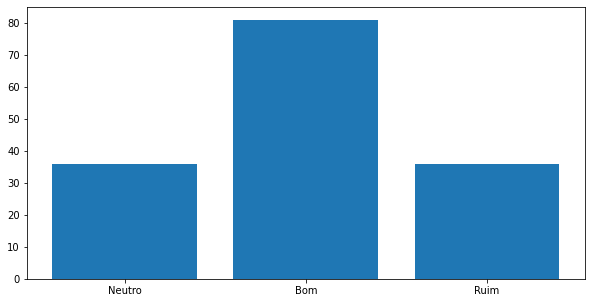

In [200]:
grupos = ['Neutro', 'Bom', 'Ruim']
plt.bar(grupos, resposta)
plt.show()

Da mesma forma que no entrosamento, usamos o mesmo código e conceitos para avaliar o auxilio/suporte da empresa.

In [ ]:
filtroneutro = respostasgu.loc[respostasgu['Como você avalia o suporte/auxílio que a sua empresa prestou durante o trabalho de Home Office? '] == 3]
filtrobom = respostasgu.loc[respostasgu['Como você avalia o suporte/auxílio que a sua empresa prestou durante o trabalho de Home Office? '] > 3]
filtroruim = respostasgu.loc[respostasgu['Como você avalia o suporte/auxílio que a sua empresa prestou durante o trabalho de Home Office? '] < 3]
neutras = filtroneutro['Como você avalia o suporte/auxílio que a sua empresa prestou durante o trabalho de Home Office? '].count()
bom = filtrobom['Como você avalia o suporte/auxílio que a sua empresa prestou durante o trabalho de Home Office? '].count()
ruim = filtroruim['Como você avalia o suporte/auxílio que a sua empresa prestou durante o trabalho de Home Office? '].count()
resposta = neutras, bom, ruim
resposta

(37, 83, 33)

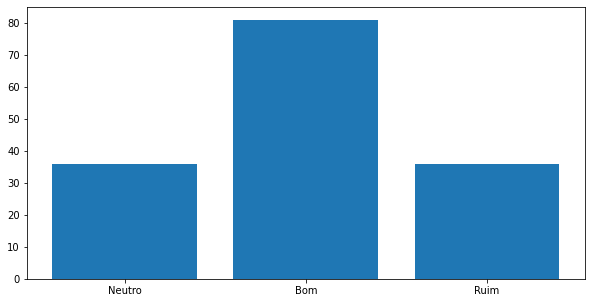

In [201]:
grupos = ['Neutro', 'Bom', 'Ruim']
plt.bar(grupos, resposta)
plt.show()

## **Relação entre Idades e Respostas**

Por fim, antes de analisarmos os dados gerais, concluimos que seria bom filtrar alguns dados com relação a idade do pessoal que trabalhou de casa. dessa forma o código e as correlações abaixo foram pensadas e geradas para corrobourar questões de idades. 

In [202]:
import pandas as pd

respostas = pd.read_csv('https://github.com/vittoria-thomasini/comportment-analytics-covid19/blob/main/Planilhas/Idades.csv?raw=true', delimiter = ';')
respostas.head()

,Qual sua Idade?,Você trabalhou de casa durante a pandemia?,Seu trabalho permite o modelo Home Office?,Você se vê e/ou gostaria de trabalhar remotamente no futuro?,Você já exercia esse modelo de trabalho?,Você sente que sua carga de trabalho aumentou durante o trabalho de casa?,Por conta do home office você trabalhou mais do que a sua carga horária contratual?,Você se vê e/ou pretende trabalhar remotamente no futuro?,Como você avalia sua adaptação ao Home Office?,Como você avalia a sua produtividade durante a pandemia?,Como você avalia o seu foco durante o trabalho de Home Office?,Como você avalia o seu nível de fadiga (Cansaço excessivo) durante o trabalho de Home Office?,Como você avalia o seu nível de estresse durante o trabalho de Home Office?,Como você avalia o suporte/auxílio que a sua empresa prestou durante o trabalho de Home Office?,Como você avalia o entrosamento com seus colegas de trabalho durante Home Office?,Como foi sua experiência em trabalhar de casa?
0,Entre 18 e 25 anos,Não,Sim,Sim,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Entre 18 e 25 anos,Sim,NaN,NaN,Não,Não,Não,Sim,5.0,4.0,4.0,3.0,3.0,3.0,4.0,5.0
2,Entre 18 e 25 anos,Sim,NaN,NaN,Não,Não,Não,Não,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
3,Entre 18 e 25 anos,Sim,NaN,NaN,Não,Sim,Sim,Não,4.0,3.0,4.0,5.0,4.0,5.0,5.0,4.0
4,Entre 18 e 25 anos,Sim,NaN,NaN,Não,Não,Não,Sim,4.0,3.0,2.0,5.0,3.0,3.0,2.0,3.0


In [ ]:
respostas = respostas.replace('Menos de 18 anos', '-18')
respostas = respostas.replace('Entre 18 e 25 anos', '18-25')
respostas = respostas.replace('Entre 26 e 35 anos', '26-35')
respostas = respostas.replace('Entre 36 e 45 anos', '36-45')
respostas = respostas.replace('Entre 46 e 60 anos', '46-59')
respostas = respostas.replace('mais de 60 anos', '60+')
respostas = respostas.replace('Sim', 1)
respostas = respostas.replace('Não', 0)

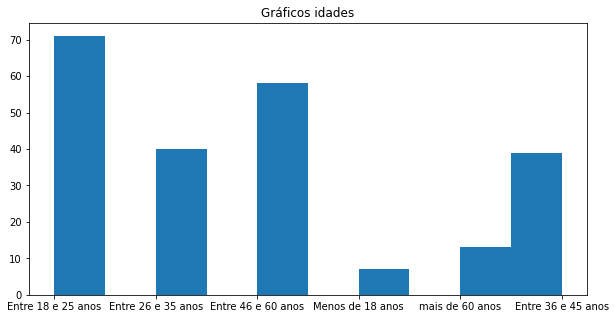

In [204]:
import matplotlib.pyplot as plt

plt.hist(respostas["Qual sua Idade?"])
plt.title("Gráficos idades")
plt.show()

In [ ]:
print('Total de Pessoas que trabalharam remotamente durante a pandemia')
filtro1_1 = respostas.loc[respostas['Você trabalhou de casa durante a pandemia?'] == 1]
filtro1_1['Você trabalhou de casa durante a pandemia?'].count()

Total de Pessoas que trabalharam remotamente durante a pandemia


153

In [ ]:
print('Total de Pessoas que NÃO trabalharam remotamente durante a pandemia')
filtro1_2 = respostas.loc[respostas['Você trabalhou de casa durante a pandemia?'] == 0]
filtro1_2['Você trabalhou de casa durante a pandemia?'].count()

Total de Pessoas que NÃO trabalharam remotamente durante a pandemia


75

In [ ]:
## Pessoas que NÃO trabalharam remotamente durante a pandemia

respostas2 = pd.read_csv('https://github.com/vittoria-thomasini/comportment-analytics-covid19/blob/main/Planilhas/Idades.csv?raw=true', delimiter = ';', usecols = ["Qual sua Idade?", "Você se vê e/ou gostaria de trabalhar remotamente no futuro?"])
respostas2 = respostas2.replace('Menos de 18 anos', '-18')
respostas2 = respostas2.replace('Entre 18 e 25 anos', '18-25')
respostas2 = respostas2.replace('Entre 26 e 35 anos', '26-35')
respostas2 = respostas2.replace('Entre 36 e 45 anos', '36-45')
respostas2 = respostas2.replace('Entre 46 e 60 anos', '46-59')
respostas2 = respostas2.replace('mais de 60 anos', '60+')
respostas2 = respostas2.replace('Sim', 1)
respostas2 = respostas2.replace('Não', 0)

respostas2

,Qual sua Idade?,Você se vê e/ou gostaria de trabalhar remotamente no futuro?
0,18-25,1.0
1,18-25,NaN
2,18-25,NaN
3,18-25,NaN
4,18-25,NaN
...,...,...
223,60+,NaN
224,36-45,NaN
225,18-25,1.0
226,26-35,NaN


In [ ]:
## Sim = 1 / Não = 0

filtro2_1 = respostas2.loc[respostas2['Você se vê e/ou gostaria de trabalhar remotamente no futuro?'] == 1]
filtro2_2 = respostas2.loc[respostas2['Você se vê e/ou gostaria de trabalhar remotamente no futuro?'] == 0]

In [ ]:
print('Total de Sim')
filtro2_1['Você se vê e/ou gostaria de trabalhar remotamente no futuro?'].count()

Total de Sim


25

In [ ]:
print('Total de Não')
filtro2_2['Você se vê e/ou gostaria de trabalhar remotamente no futuro?'].count()

Total de Não


50

Idade pessoas que NÃO gostariam de trabalhar remotamente no futuro


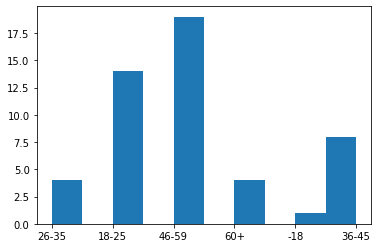

In [ ]:
print('Idade pessoas que NÃO gostariam de trabalhar remotamente no futuro')
plt.hist(filtro2_2["Qual sua Idade?"])
plt.show()

In [ ]:
## Pessoas que trabalharam remotamente durante a pandemia

respostas3 = pd.read_csv('https://github.com/vittoria-thomasini/comportment-analytics-covid19/blob/main/Planilhas/Idades.csv?raw=true', delimiter = ';', usecols = ["Qual sua Idade?", "Você se vê e/ou pretende trabalhar remotamente no futuro?"])
respostas3 = respostas3.replace('Menos de 18 anos', '-18')
respostas3 = respostas3.replace('Entre 18 e 25 anos', '18-25')
respostas3 = respostas3.replace('Entre 26 e 35 anos', '26-35')
respostas3 = respostas3.replace('Entre 36 e 45 anos', '36-45')
respostas3 = respostas3.replace('Entre 46 e 60 anos', '46-59')
respostas3 = respostas3.replace('mais de 60 anos', '60+')
respostas3 = respostas3.replace('Sim', 1)
respostas3 = respostas3.replace('Não', 0)

respostas3

,Qual sua Idade?,Você se vê e/ou pretende trabalhar remotamente no futuro?
0,18-25,NaN
1,18-25,1.0
2,18-25,0.0
3,18-25,0.0
4,18-25,1.0
...,...,...
223,60+,0.0
224,36-45,0.0
225,18-25,NaN
226,26-35,1.0


In [ ]:
## Sim = 1 / Não = 0

filtro3_1 = respostas3.loc[respostas3['Você se vê e/ou pretende trabalhar remotamente no futuro?'] == 1]
filtro3_2 = respostas3.loc[respostas3['Você se vê e/ou pretende trabalhar remotamente no futuro?'] == 0]

In [ ]:
print('Total de Sim')
filtro3_1['Você se vê e/ou pretende trabalhar remotamente no futuro?'].count()

Total de Sim


110

In [ ]:
print('Total de Não')
filtro3_2['Você se vê e/ou pretende trabalhar remotamente no futuro?'].count()

Total de Não


43

Idade pessoas que gostariam de trabalhar remotamente no futuro


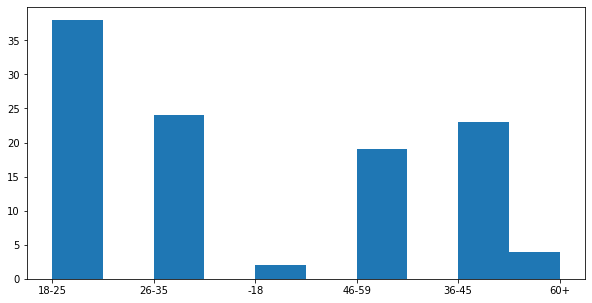

In [ ]:
print('Idade pessoas que gostariam de trabalhar remotamente no futuro')
plt.hist(filtro3_1["Qual sua Idade?"])
plt.show()

In [ ]:
## Adaptação ao Home Office

respostas4 = pd.read_csv('https://github.com/vittoria-thomasini/comportment-analytics-covid19/blob/main/Planilhas/Idades.csv?raw=true', delimiter = ';', usecols = ["Qual sua Idade?", "Como você avalia sua adaptação ao Home Office?"])
respostas4 = respostas4.replace('Menos de 18 anos', '-18')
respostas4 = respostas4.replace('Entre 18 e 25 anos', '18-25')
respostas4 = respostas4.replace('Entre 26 e 35 anos', '26-35')
respostas4 = respostas4.replace('Entre 36 e 45 anos', '36-45')
respostas4 = respostas4.replace('Entre 46 e 60 anos', '46-59')
respostas4 = respostas4.replace('mais de 60 anos', '60+')

respostas4

,Qual sua Idade?,Como você avalia sua adaptação ao Home Office?
0,18-25,NaN
1,18-25,5.0
2,18-25,3.0
3,18-25,4.0
4,18-25,4.0
...,...,...
223,60+,3.0
224,36-45,2.0
225,18-25,NaN
226,26-35,4.0


In [ ]:
## >3 = bom / <3 = ruim / 3 = neutro

filtro4_1 = respostas4.loc[respostas4['Como você avalia sua adaptação ao Home Office?'] > 3]
filtro4_2 = respostas4.loc[respostas4['Como você avalia sua adaptação ao Home Office?'] < 3]
filtro4_3 = respostas4.loc[respostas4['Como você avalia sua adaptação ao Home Office?'] == 3]

In [ ]:
print('Total de Bom')
filtro4_1['Como você avalia sua adaptação ao Home Office?'].count()

Total de Bom


105

In [ ]:
print('Total de Neutros')
filtro4_3['Como você avalia sua adaptação ao Home Office?'].count()

Total de Neutros


34

In [ ]:
print('Total de Ruim')
filtro4_2['Como você avalia sua adaptação ao Home Office?'].count()

Total de Ruim


14

Idade pessoas que se adaptaram bem ao Home Office


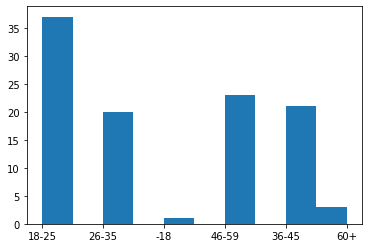

In [ ]:
print('Idade pessoas que se adaptaram bem ao Home Office')
plt.hist(filtro4_1["Qual sua Idade?"])
plt.show()

In [ ]:
## Nível de Fadíga

respostas5 = pd.read_csv('https://github.com/vittoria-thomasini/comportment-analytics-covid19/blob/main/Planilhas/Idades.csv?raw=true', delimiter = ';', usecols = ["Qual sua Idade?", "Como você avalia o seu nível de fadiga (Cansaço excessivo) durante o trabalho de Home Office?"])
respostas5 = respostas5.replace('Menos de 18 anos', '-18')
respostas5 = respostas5.replace('Entre 18 e 25 anos', '18-25')
respostas5 = respostas5.replace('Entre 26 e 35 anos', '26-35')
respostas5 = respostas5.replace('Entre 36 e 45 anos', '36-45')
respostas5 = respostas5.replace('Entre 46 e 60 anos', '46-59')
respostas5 = respostas5.replace('mais de 60 anos', '60+')
respostas5 = respostas5.replace('Sim', 1)
respostas5 = respostas5.replace('Não', 0)

respostas5

In [ ]:
## >3 = bom / <3 = ruim / 3 = neutro

filtro5_1 = respostas5.loc[respostas5['Como você avalia o seu nível de fadiga (Cansaço excessivo) durante o trabalho de Home Office?'] > 3]
filtro5_2 = respostas5.loc[respostas5['Como você avalia o seu nível de fadiga (Cansaço excessivo) durante o trabalho de Home Office?'] < 3]
filtro5_3 = respostas5.loc[respostas5['Como você avalia o seu nível de fadiga (Cansaço excessivo) durante o trabalho de Home Office?'] == 3]

In [ ]:
print('Total de Bom')
filtro5_1['Como você avalia o seu nível de fadiga (Cansaço excessivo) durante o trabalho de Home Office?'].count()

In [ ]:
print('Total de Neutro')
filtro5_2['Como você avalia o seu nível de fadiga (Cansaço excessivo) durante o trabalho de Home Office?'].count()

In [ ]:
print('Total de Ruim')
filtro5_3['Como você avalia o seu nível de fadiga (Cansaço excessivo) durante o trabalho de Home Office?'].count()

In [ ]:
print('Idade das pessoas que tiveram seu nível de fadíga aumentado')
plt.hist(filtro5_3["Qual sua Idade?"])
plt.show()

<h2>Seção final</h2>

Perfís definidos:

Esta seção é inteiramente para analise e desenvolvimento dos perfís dos usuários respondentes do formulário. Nela, chegamos a uma base de resultados que, conforme as repostas pudemos definir padrões de usuários e elenca-los conforme a sua média de pontos. Diante disso, nos detemos a 3 perfis de usuários padrões, que reconhecemos ao longo da pesquisa. Decidimos não elencar perfils além desses, por, esses já serem os mais conhecidos no mercado de trabalho. Porém, logo após essa pesquisa, definimos um perfil que seria o do profissional do futuro. Abaixo, temos a pontuação a ser atingida pelos respondetes que os enquadra em algum dos perfis listados.

---

1 Presencial - Perfís com média Menor ou igual a 20

---

2 Hibrido - Perfís com média Maior que 20 e menor ou igual a 30

---

3 Home Office - Perfis com média maior que 30

---

Tendo essa pontuação, tratamos os dados da planilha para enquadrar os usuários em determinados perfis, conforme o códifo abaixo:

In [184]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/vittoria-thomasini/comportment-analytics-covid19/main/Planilhas/Trabalho%20de%20Casa.csv', delimiter = ';')

df['total'] = df['Como você avalia sua adaptação ao Home Office?'] + df['Como você avalia a sua produtividade durante a pandemia?'] + df['Como você avalia o seu foco durante o trabalho de Home Office?'] + df['Como você avalia o seu nível de fadiga (Cansaço excessivo) durante o trabalho de Home Office?'] + df['Como você avalia o seu nível de estresse durante o trabalho de Home Office?'] + df['Como você avalia o suporte/auxílio que a sua empresa prestou durante o trabalho de Home Office? '] + df['Como você avalia o entrosamento com seus colegas de trabalho durante Home Office?'] + df['Como foi sua experiência em trabalhar de casa?']

total = df['total']

presencial = 0
hibrido = 0
homeoffice = 0

for i in total:
  if i <= 20:
    presencial = presencial + 1

for i in total:
  if i > 20 and i <= 30:
    hibrido = hibrido + 1

for i in total:
  if i > 30:
    homeoffice = homeoffice + 1

perfis = homeoffice, hibrido, presencial
perfis


(57, 79, 17)

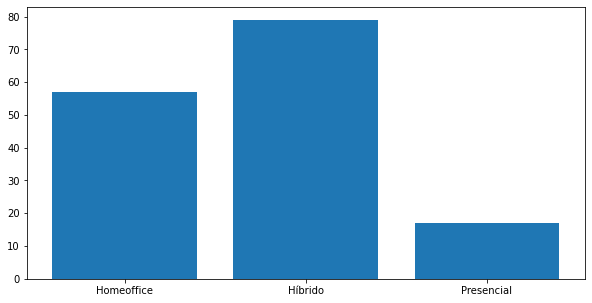

In [185]:
grupos = ['Homeoffice', 'Híbrido', 'Presencial']
plt.bar(grupos, perfis)
plt.show()

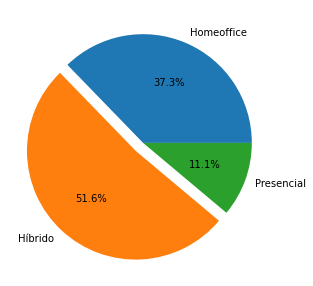

In [187]:
labels = ['Homeoffice', 'Híbrido','Presencial']
explode = (0, 0.1, 0) 
plt.pie(perfis, labels=labels, autopct='%1.1f%%', explode=explode)
plt.show()


Profissional Anywhere
---

O profissional AnyWhere, se trata do profissional do futuro, que, tem flexibilidade de horários e de locais. Podendo trabalhar dos horarios que ele julga ser mais produtivos e de locais que ele se sente mais confortável. Diante disso, criamos um código específico para listar todos da ferramenta que se enquadram nesse perfil. obviamente este perfil tem algumas "skills" diferenciadas e que se destacam quando o assunto é Home Office.



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

respostasgeral = pd.read_csv('https://raw.githubusercontent.com/vittoria-thomasini/comportment-analytics-covid19/main/Planilhas/Trabalho%20de%20Casa.csv', delimiter = ';')

Anywhere = respostasgeral.loc[respostasgeral['Como você avalia sua adaptação ao Home Office?'] > 3]
Anywhere = Anywhere.loc[Anywhere['Como você avalia a sua produtividade durante a pandemia?'] > 3]
Anywhere = Anywhere.loc[Anywhere['Como você avalia o seu foco durante o trabalho de Home Office?'] > 3]
Anywhere = Anywhere.loc[Anywhere['Como você avalia o seu nível de fadiga (Cansaço excessivo) durante o trabalho de Home Office?'] > 3]
Anywhere = Anywhere.loc[Anywhere['Como você avalia o seu nível de estresse durante o trabalho de Home Office?'] > 3]
Anywhere = Anywhere.loc[Anywhere['Como você avalia o suporte/auxílio que a sua empresa prestou durante o trabalho de Home Office? '] > 3]
Anywhere = Anywhere.loc[Anywhere['Como você avalia o entrosamento com seus colegas de trabalho durante Home Office?'] > 3]
Anywhere = Anywhere.loc[Anywhere['Como foi sua experiência em trabalhar de casa?'] > 3]
Anywhere

,Qual sua Idade?,Você trabalhou de casa durante a pandemia?,Você já exercia esse modelo de trabalho?,Você sente que sua carga de trabalho aumentou durante o trabalho de casa?,Por conta do home office você trabalhou mais do que a sua carga horária contratual?,Você se vê e/ou pretende trabalhar remotamente no futuro?,Como você avalia sua adaptação ao Home Office?,Como você avalia a sua produtividade durante a pandemia?,Como você avalia o seu foco durante o trabalho de Home Office?,Como você avalia o seu nível de fadiga (Cansaço excessivo) durante o trabalho de Home Office?,Como você avalia o seu nível de estresse durante o trabalho de Home Office?,Como você avalia o suporte/auxílio que a sua empresa prestou durante o trabalho de Home Office?,Como você avalia o entrosamento com seus colegas de trabalho durante Home Office?,Como foi sua experiência em trabalhar de casa?
18,Entre 46 e 60 anos,Sim,Não,Sim,Sim,Sim,4,5,4,4,4,5,4,5
21,Entre 18 e 25 anos,Sim,Não,Não,Não,Sim,5,4,4,4,4,4,5,5
24,Entre 18 e 25 anos,Sim,Não,Não,Não,Sim,5,4,4,4,4,5,5,5
47,Entre 26 e 35 anos,Sim,Não,Não,Não,Sim,5,5,5,5,4,4,4,5
66,mais de 60 anos,Sim,Não,Não,Não,Sim,5,5,5,5,5,5,5,5
77,Entre 46 e 60 anos,Sim,Não,Não,Sim,Sim,4,5,4,5,5,5,4,4
81,Entre 46 e 60 anos,Sim,Não,Sim,Sim,Sim,5,5,4,5,4,5,5,5
133,Entre 18 e 25 anos,Sim,Não,Não,Não,Sim,4,4,4,4,4,4,4,4
148,Entre 46 e 60 anos,Sim,Não,Sim,Sim,Não,4,4,5,5,5,4,4,4
151,Entre 26 e 35 anos,Sim,Não,Não,Não,Sim,4,5,4,5,5,5,4,5




---


# **Após testes e validações dos resultados, concluimos os códigos de análise e desenvolvimento do comportamento das pessoas perante ao HomeOffice em pandemia.**

---

